In [1]:
import h5py
import numpy as np
import os
import pandas as pd
from pathlib import Path
import re
import scipy
import time

from os import listdir
from os.path import isfile, join

import matplotlib
from matplotlib import pyplot as plt

import bacco

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code')
import utils
import plotter

2024-08-18 15:31:55.123527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 15:31:57.123877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 15:31:57.132109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 15:32:14.920228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-18 15:32:42.031960: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gp

In [2]:
matplotlib.pyplot.style.use('default')
matplotlib.pyplot.close('all')

matplotlib.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams['xtick.labelsize'] = 16 
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['lines.linewidth'] = 2

In [28]:
gal_arr = []
fn_arr = []

dir_base = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository'
dir_base_input = '/dipc/kstoreyf/external/LGalaxaies2020_PublicRepository/input'
model = 'modified' #'default'

tags_lgal = ['_orig']
for tag_lgal in tags_lgal:
       
    dir_out = f'{dir_base}/output/output{tag_lgal}/samples'
    fn_out = f'{dir_out}/Planck_Mil-I_snapshots_{model}_test1_z0.00-0.00_All.npy'
    fn_out_tree = f'{dir_out}/Planck_Mil-I_snapshots_{model}_test1_z0.00-0.00_All_treefiles.npy'
    print(fn_out)
    gals = np.load(fn_out)
    gal_arr.append(gals)
    fn_arr.append(fn_out)

/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_orig/samples/Planck_Mil-I_snapshots_modified_test1_z0.00-0.00_All.npy


In [5]:
gals = gal_arr[0]

In [19]:
gals['Pos'].shape

(2586, 3)

In [32]:
set_types = list(set(gals['Type']))
print(set_types)

[0, 1, 940640577, 956425091, 951370468, 2, 976031878, 930788198, 999615945, 964052714, 1048224842, 979418585, 922830619]


In [33]:
for type in set_types:
    print(type, np.sum(gals['Type']==type))

0 1524
1 495
940640577 1
956425091 1
951370468 1
2 557
976031878 1
930788198 1
999615945 1
964052714 1
1048224842 1
979418585 1
922830619 1


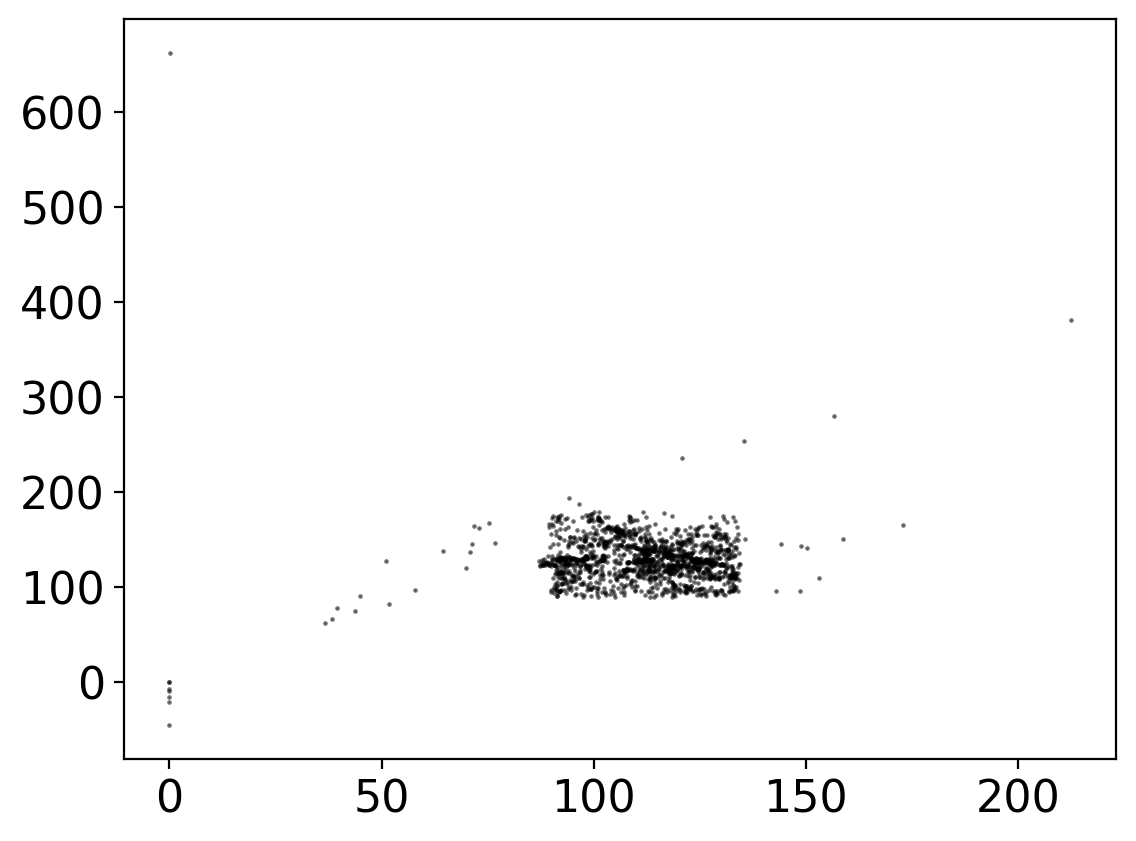

In [36]:
i_gals = np.where(gals['Type'] == 0)[0]
plt.scatter(gals[i_gals]['Pos'][:,0], gals[i_gals]['Pos'][:,1], s=2, alpha=0.5, marker='.', c='k')

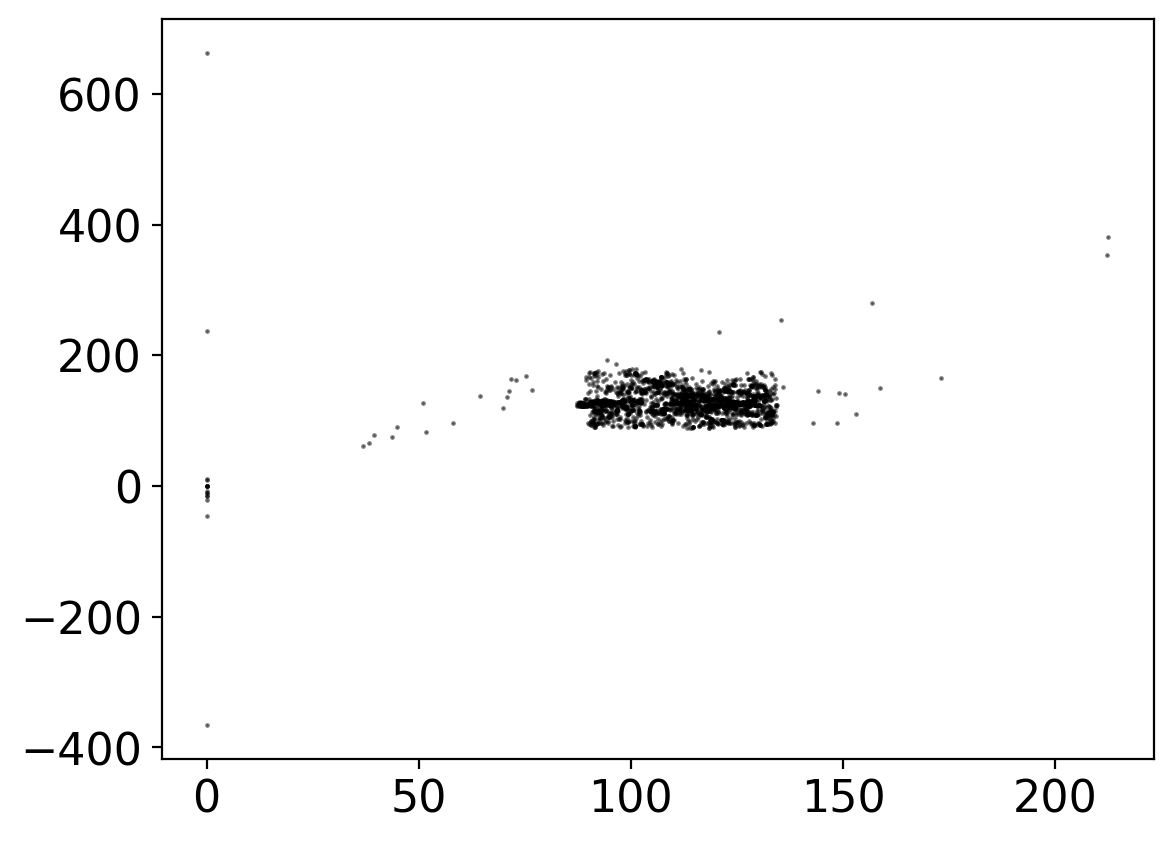

In [14]:
plt.scatter(gals['Pos'][:,0], gals['Pos'][:,1], s=2, alpha=0.5, marker='.', c='k')

(50.0, 200.0)

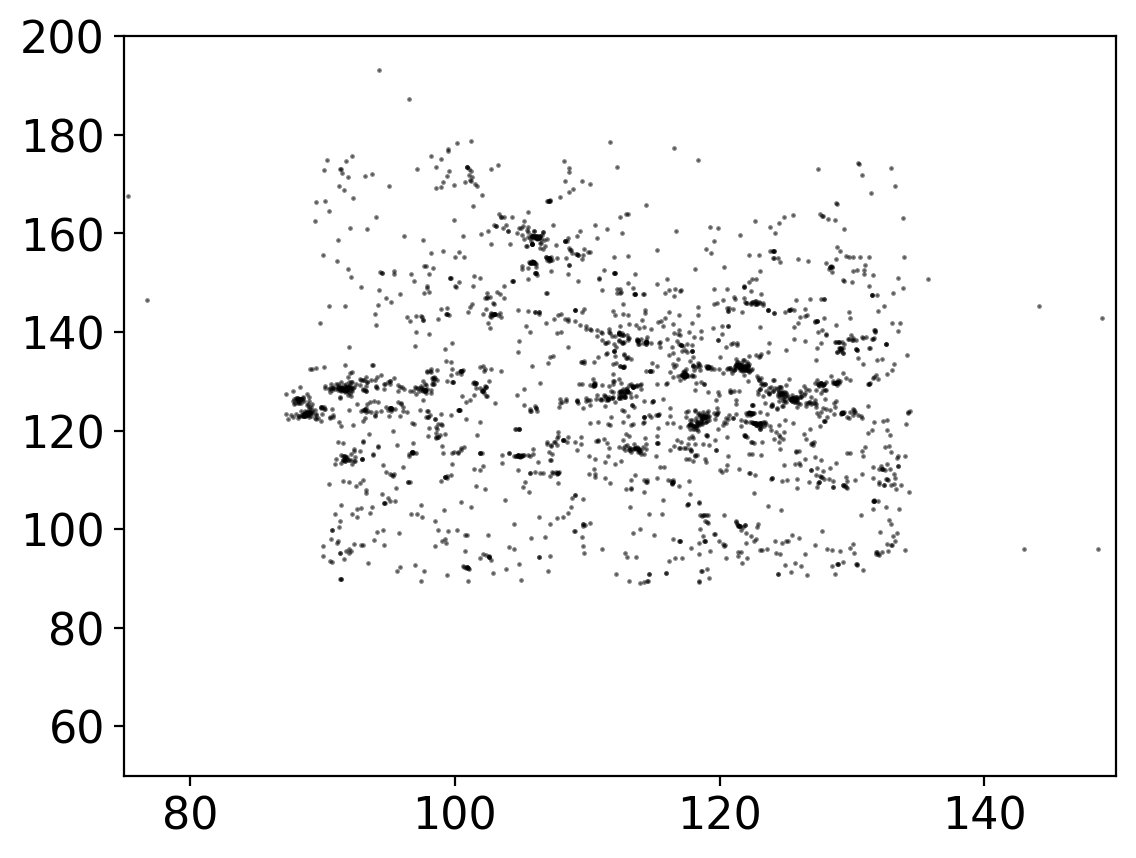

In [18]:
plt.scatter(gals['Pos'][:,0], gals['Pos'][:,1], s=2, alpha=0.5, marker='.', c='k')
plt.xlim(75, 150)
plt.ylim(50, 200)

In [22]:
print(bacco.cosmo_parameters.Millennium)

{'omega_cdm': 0.205, 'omega_de': 0.75, 'omega_baryon': 0.045, 'hubble': 0.73, 'neutrino_mass': 0.0, 'sigma8': 0.9, 'ns': 1.0, 'tag': 'MS'}


In [24]:
box_size = 480.279
omega_matter = 0.315
baryon_fraction = 0.155
omega_baryon = omega_matter * baryon_fraction
omega_cdm = omega_matter - omega_baryon
mill_planck_dict = {'omega_baryon': omega_baryon, #omega_m * baryon_fraction
             'omega_de': 0.685,
             'hubble': 0.673,
             'omega_cdm': omega_cdm,
             }
cosmo = bacco.Cosmology(verbose=False, **mill_planck_dict)

#box_size = 500.
#cosmo = bacco.Cosmology(verbose=False, **bacco.cosmo_parameters.Millennium)
print(cosmo.pars)

h = cosmo.pars['hubble']
print(h)
#vol_Mpc = (box_size/h)**3 # X Mpc/h = X/h Mpc

# from main_lgals.py:
# Volume = (BoxSideLength**3.0) * TreeFilesUsed / TotTreeFiles
TreeFilesUsed = 1
TotTreeFiles = 512
vol_Mpch = box_size**3 * TreeFilesUsed / TotTreeFiles
vol_Mpc = vol_Mpch / h**3 # X Mpc/h * (h/0.7) = X/0.7 Mpc
print(vol_Mpc, vol_Mpch)

{'hubble': 0.673, 'sigma8': 0.9, 'A_s': None, 'omega_baryon': 0.048825, 'omega_cdm': 0.266175, 'w0': -1, 'wa': 0, 'ns': 0.9611, 'tau': 0.0952, 'approx_nu': False, 'num_massive_neutrinos': 0, 'neutrino_mass': 0.0, 'Neffective': 3.046, 'DeltaNeff': 3.046, 'GammaNu': 0.71611, 'omega_neutrino': 0.0, 'omega_matter': 0.315, 'omega_cold': 0.315, 'photon_temperature': 2.7255, 'omega_photons': 0.0, 'omega_rad': 0.0, 'omega_k': 0.0, 'omega_de': 0.685, 'omega_tot': 1.0}
0.673
709848.4518229245 216376.86897022976


In [25]:
smf_arr = []
for i in range(len(gal_arr)):
    log_mstar = np.log10(gal_arr[i]['StellarMass'])
    bins_log_mstar, smf = utils.compute_smf(log_mstar, vol_Mpc)
    smf_arr.append(smf)

In [26]:
# probabilistic SMF
# in Mpc^-3 (no h factor!!)
fn_psmf_bgs = '../data/psmf.sv3.bgs_bright.z0.01_0.05.dat'
ms, psmf_bgs_mean, psmf_bgs_std = np.loadtxt(fn_psmf_bgs, unpack=True)

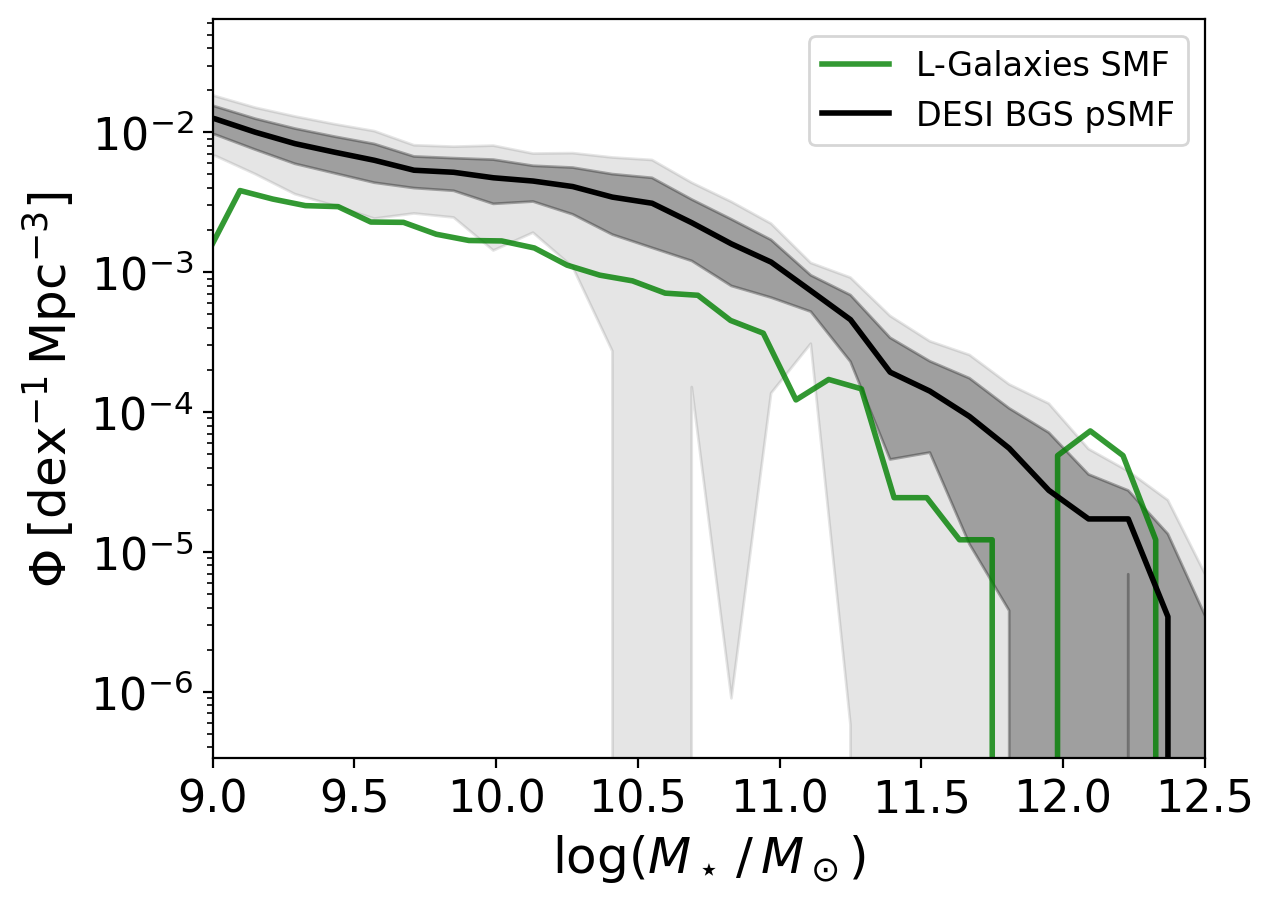

In [27]:
rng = np.random.default_rng()
#colors = ['black']*len(smf_arr)
#color_mode = 'continuous'
#colors, cmap, locs_norm = utils.get_colors(vals_kagn, log=True)
colors = ['green', 'blue', 'purple']
color_mode = None
 
for i in range(len(smf_arr)):
    if i==0:
        label='L-Galaxies SMF'
    else:
        label=None
    plt.plot(bins_log_mstar, smf_arr[i], lw=2, color=colors[i], 
             alpha=0.8, label=label)
if color_mode=='continuous':
    ax = plt.gca()
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
    cb = plt.colorbar(sm, ax=ax, extend='max')
    cbar_label = r'$k_\text{AGN}$, efficiency of AGN feedback'
    cb.set_label(label=cbar_label, size=14)
        

plt.plot(ms, psmf_bgs_mean, color='black', label=r'DESI BGS pSMF')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 )
plt.fill_between(ms, 
                 psmf_bgs_mean-2*psmf_bgs_std, 
                 psmf_bgs_mean+2*psmf_bgs_std,
                 color='black', alpha=0.1,
                 )

# plt.errorbar(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, yerr=m13ksf_err, color='blue', marker='o', 
#              alpha=0.5, markersize=4, ls='None', #facecolor='None', s=8,
#              label='SDSS/PRIMUS \n(Moustakas+2013)')
    
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
plt.xlim(9, 12.5)

handles, labels = plt.gca().get_legend_handles_labels()
if color_mode=='discrete':
    handles.extend(handles_discrete)
plt.legend(handles=handles, fontsize=12)



### check halos

In [6]:
struct_lgalinput = np.dtype([
('Descendant',np.int32,1),
('FirstProgenitor',np.int32,1),
('NextProgenitor',np.int32,1),
('FirstHaloInFOFgroup',np.int32,1),
('NextHaloInFOFgroup',np.int32,1),
('Len',np.int32,1),
('M_Mean200',np.float32,1),
('M_Crit200',np.float32,1),
('M_TopHat',np.float32,1),
('Pos',np.float32,3),
('Vel',np.float32,3),
('VelDisp',np.float32,1),
('Vmax',np.float32,1),
('Spin',np.float32,3),
('MostBoundID',np.int64,1),
('SnapNum',np.int32,1),
('FileNr',np.int32,1),
('SubhaloIndex',np.int32,1),
('SubHalfMass',np.int32,1)
])

def read_input_tree(folder,firstfile,lastfile,lastsnap):
    """ Reads the tree files that are used for input into L-Galaxies. """ 
    nHalos = 0
    nTrees = 0
    ngalstree = np.array([],dtype=np.int32)
    output_trees = np.array([],dtype=struct_lgalinput)
    for ifile in range(firstfile,lastfile+1):
        filename = folder+"/trees_%03d.%d"%(lastsnap,ifile)
        f = open(filename,"rb")
        this_nTrees = np.fromfile(f,np.int32,1)[0]
        this_nHalos = np.fromfile(f,np.int32,1)[0]
        this_ngalstree = np.fromfile(f,np.int32,this_nTrees)
        this_trees = np.fromfile(f,struct_lgalinput,this_nHalos)
        nHalos += this_nHalos
        nTrees += this_nTrees
        ngalstree = np.append(ngalstree,this_ngalstree)
        output_trees = np.append(output_trees,this_trees)
    return (nHalos,nTrees,ngalstree,output_trees)

/tmp/ipykernel_288758/3785887644.py:1: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  struct_lgalinput = np.dtype([


In [7]:
dir_trees = '/cosmos_storage/simulations/MR/treedata'
tree_in = read_input_tree(dir_trees,5,5,63)

In [8]:
halos = tree_in[3]

In [19]:
np.min(halos['M_Mean200']), np.min(halos['M_Mean200'][halos['M_Mean200']>0]), np.max(halos['M_Mean200'])

(0.0, 0.516394, 55183.844)

-inf 9.712981 14.741813


/tmp/ipykernel_288758/2499282788.py:1: RuntimeWarning: divide by zero encountered in log10
  log_mhalo = np.log10(halos['M_Mean200']*1e10)


Text(0.5, 0, 'M_Mean200')

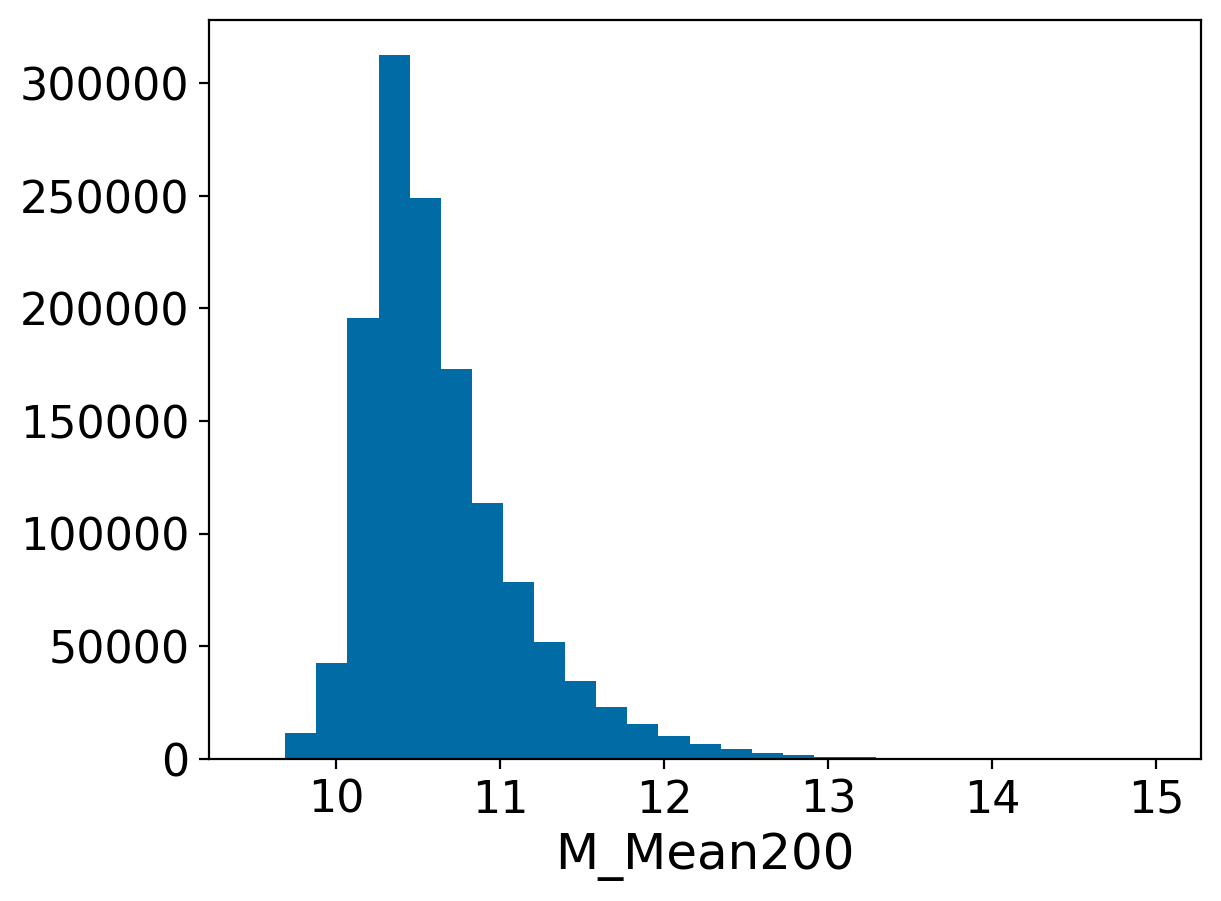

In [21]:
log_mhalo = np.log10(halos['M_Mean200']*1e10)
print(np.min(log_mhalo), np.min(log_mhalo[halos['M_Mean200']>0]), np.max(log_mhalo))
bins = np.linspace(9.5, 15, 30)
plt.hist(log_mhalo, bins=bins)
plt.xlabel('M_Mean200')

In [15]:
DMParticleMass = 0.0961104*1e10 #Msun/h 
ParticleMassRes = 20.
mhalo_lim = DMParticleMass*ParticleMassRes
log_mhalo_lim = np.log10(mhalo_lim)
print(mhalo_lim)
print(log_mhalo_lim)

19222080000.0
10.283800380400491


In [17]:
print(np.sum(log_mhalo > log_mhalo_lim), len(log_mhalo))

1043901 1500436


In [ ]:
log_mhalo = np.log10(halos['M_Mean200']*1e10)
print(np.min(log_mhalo), np.max(log_mhalo))
bins = np.linspace(1, 15, 30)
plt.hist(halos['M_Mean200'], bins=bins)
plt.xlabel('M_Mean200')

### DM - default model

In [3]:
box_size = 480.279
omega_matter = 0.315
baryon_fraction = 0.155
omega_baryon = omega_matter * baryon_fraction
omega_cdm = omega_matter - omega_baryon
mill_planck_dict = {'omega_baryon': omega_baryon, #omega_m * baryon_fraction
             'omega_de': 0.685,
             'hubble': 0.673,
             'omega_cdm': omega_cdm,
             }
cosmo = bacco.Cosmology(verbose=False, **mill_planck_dict)

#box_size = 500.
#cosmo = bacco.Cosmology(verbose=False, **bacco.cosmo_parameters.Millennium)
print(cosmo.pars)

h = cosmo.pars['hubble']
print(h)
#vol_Mpc = (box_size/h)**3 # X Mpc/h = X/h Mpc

# from main_lgals.py:
# Volume = (BoxSideLength**3.0) * TreeFilesUsed / TotTreeFiles
TreeFilesUsed = 1
TotTreeFiles = 512
vol_Mpch = box_size**3 * TreeFilesUsed / TotTreeFiles
vol_Mpc = vol_Mpch / h**3 # X Mpc/h * (h/0.7) = X/0.7 Mpc
print(vol_Mpc, vol_Mpch)

{'hubble': 0.673, 'sigma8': 0.9, 'A_s': None, 'omega_baryon': 0.048825, 'omega_cdm': 0.266175, 'w0': -1, 'wa': 0, 'ns': 0.9611, 'tau': 0.0952, 'approx_nu': False, 'num_massive_neutrinos': 0, 'neutrino_mass': 0.0, 'Neffective': 3.046, 'DeltaNeff': 3.046, 'GammaNu': 0.71611, 'omega_neutrino': 0.0, 'omega_matter': 0.315, 'omega_cold': 0.315, 'photon_temperature': 2.7255, 'omega_photons': 0.0, 'omega_rad': 0.0, 'omega_k': 0.0, 'omega_de': 0.685, 'omega_tot': 1.0}
0.673
709848.4518229245 216376.86897022976


In [21]:
gal_arr = []
fn_arr = []

dir_base = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository'
dir_base_input = '/dipc/kstoreyf/external/LGalaxaies2020_PublicRepository/input'
model = 'default' #'default'
if model=='default':
    test_str = 'test3'
elif model=='modified':
    test_str = 'test1'

tags_lgal = ['_DM_orig', '_DM_nodetmet', '_DM_minimal_light', 
             '_DM_fasttesting', '_DM_fasttesting5',
             '_DM_sfhnbin12', '_DM_rnum1', '_DM_rnum6']
for tag_lgal in tags_lgal:
       
    dir_out = f'{dir_base}/output/output{tag_lgal}/samples'
    if tag_lgal=='_DM_sfhnbin12' or tag_lgal=='_DM_rnum1' or tag_lgal=='_DM_rnum6':
        tag_trees = '_tree5-5' #because changed code during tests
    else:
        tag_trees = ''
    fn_out = f'{dir_out}/Planck_Mil-I_snapshots_{model}_{test_str}_z0.00-0.00_All{tag_trees}.npy'
    print(fn_out)
    gals = np.load(fn_out)
    gal_arr.append(gals)
    fn_arr.append(fn_out)

/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_orig/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_nodetmet/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_minimal_light/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_fasttesting/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_fasttesting5/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_sfhnbin12/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All_tree5-5.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_rnum1/samples/Planck_Mil-I_snapshots_defa

In [22]:
smf_arr = []
for i in range(len(gal_arr)):
    log_mstar = np.log10(gal_arr[i]['StellarMass'])
    bins_log_mstar, smf = utils.compute_smf(log_mstar, vol_Mpc)
    smf_arr.append(smf)

In [5]:
gals = gal_arr[0]
print(len(gals))

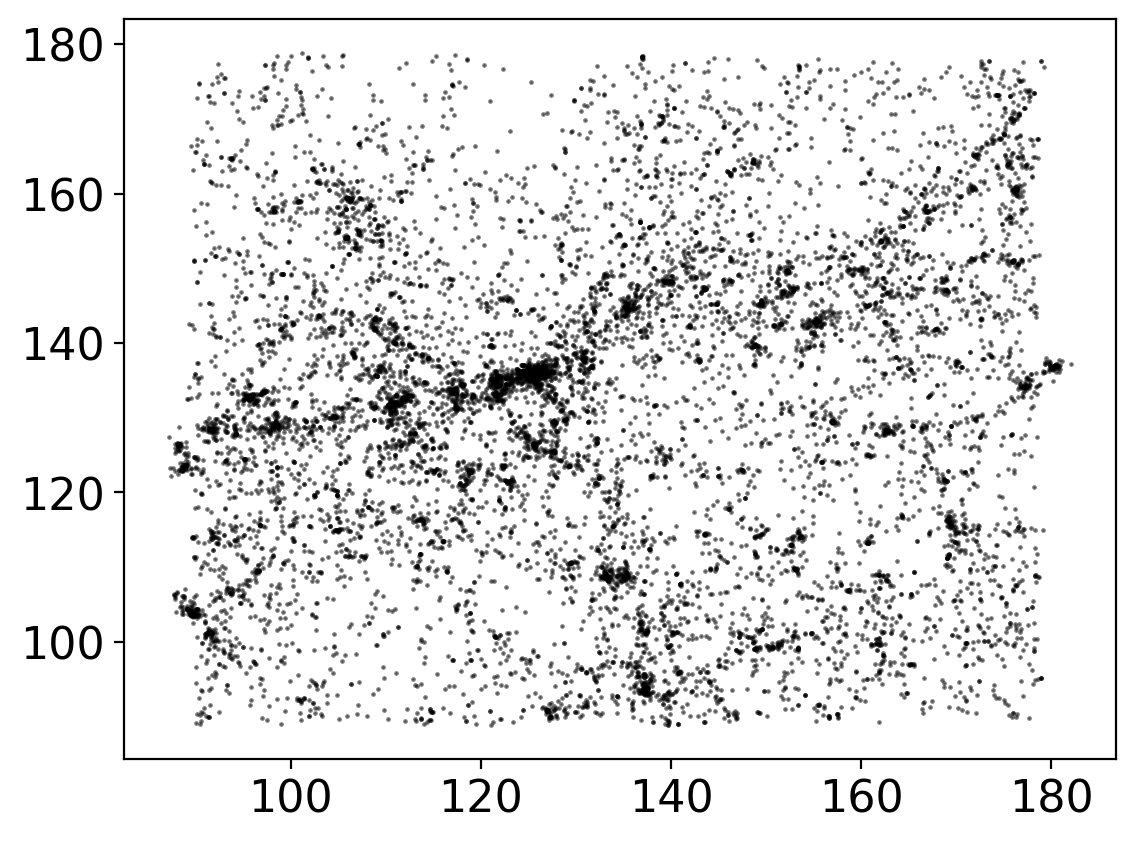

In [6]:
plt.scatter(gals['Pos'][:,0], gals['Pos'][:,1], s=2, alpha=0.5, marker='.', c='k')

In [8]:
# probabilistic SMF
# in Mpc^-3 (no h factor!!)
fn_psmf_bgs = '../data/psmf.sv3.bgs_bright.z0.01_0.05.dat'
ms, psmf_bgs_mean, psmf_bgs_std = np.loadtxt(fn_psmf_bgs, unpack=True)

DM_orig
DM_nodetmet
DM_minimal_light
DM_fasttesting
DM_fasttesting5
DM_sfhnbin12
DM_rnum1
DM_rnum6


/tmp/ipykernel_214327/971255922.py:28: RuntimeWarning: invalid value encountered in divide
  ax1.plot(bins_log_mstar, (smf_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i],
/tmp/ipykernel_214327/971255922.py:28: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(bins_log_mstar, (smf_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i],


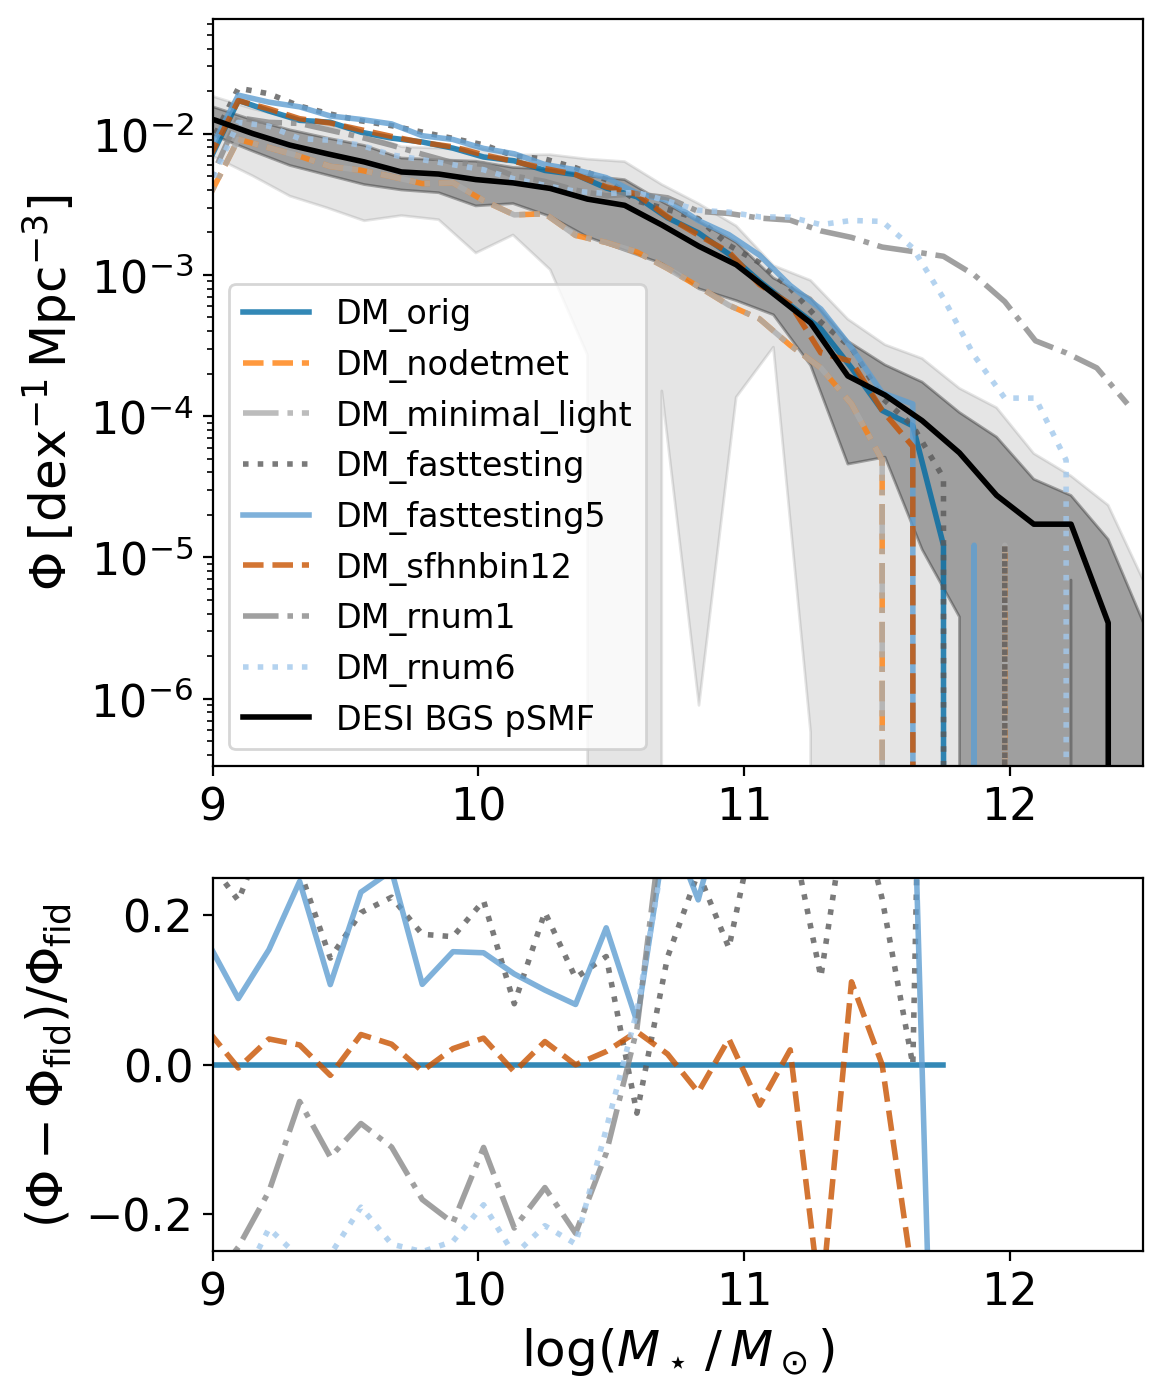

In [23]:
rng = np.random.default_rng()
#colors = ['black']*len(smf_arr)
#color_mode = 'continuous'
#colors, cmap, locs_norm = utils.get_colors(vals_kagn, log=True)
#colors = ['green', 'blue', 'purple']
lss = ['-', '--', '-.', ':', '-', '--', '-.', ':']
color_mode = None
 
fig, axarr = plt.subplots(2, 1, figsize=(6, 8), #sharex=True, 
                          height_ratios=[2, 1])
ax, ax1 = axarr
 
i_fid = 0
smf_fid = smf_arr[i_fid]

for i in range(len(smf_arr)):
    # if i==0:
    #     label='L-Galaxies SMF'
    # else:
    #     label=None
    label = tags_lgal[i][1:]
    ax.plot(bins_log_mstar, smf_arr[i], lw=2, #color=colors[i], 
             ls=lss[i],
             alpha=0.8, label=label)
    
    print(label)
    #print((smf_arr[i]-smf_fid)/smf_fid)
    ax1.plot(bins_log_mstar, (smf_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i], 
            ls=lss[i],
            alpha=0.8, label=label)
    
if color_mode=='continuous':
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
    cb = plt.colorbar(sm, ax=ax, extend='max')
    cbar_label = r'$k_\text{AGN}$, efficiency of AGN feedback'
    cb.set_label(label=cbar_label, size=14)
        

ax.plot(ms, psmf_bgs_mean, color='black', label=r'DESI BGS pSMF')
ax.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 )
ax.fill_between(ms, 
                 psmf_bgs_mean-2*psmf_bgs_std, 
                 psmf_bgs_mean+2*psmf_bgs_std,
                 color='black', alpha=0.1,
                 )

# plt.errorbar(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, yerr=m13ksf_err, color='blue', marker='o', 
#              alpha=0.5, markersize=4, ls='None', #facecolor='None', s=8,
#              label='SDSS/PRIMUS \n(Moustakas+2013)')
    
ax.set_xlim(9, 12.5)
ax1.set_xlim(9, 12.5)
ax1.set_ylim(-0.25, 0.25)

ax.set_yscale('log')
ax1.set_xlabel(r'$\log(M_\star\,/\,M_\odot)$')
ax.set_ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
ax1.set_ylabel(r'$(\Phi-\Phi_\text{fid})/\Phi_\text{fid}$')

handles, labels = ax.get_legend_handles_labels()
if color_mode=='discrete':
    handles.extend(handles_discrete)
ax.legend(handles=handles, fontsize=12)



Text(0, 0.5, 'number per bin')

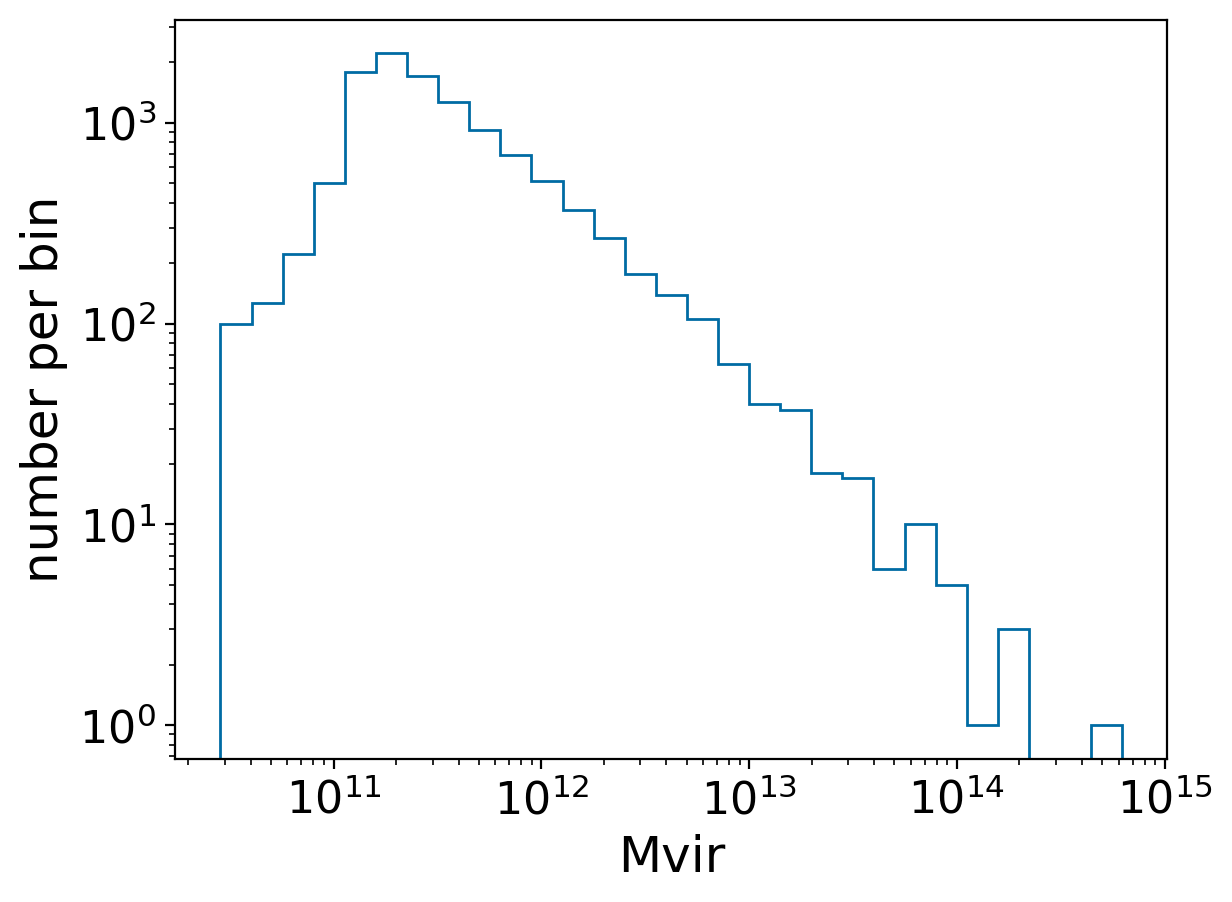

In [14]:
property_name = 'Mvir'
bins = np.logspace(np.log10(np.min(gals[property_name][gals[property_name]>0])), 
                   np.log10(np.max(gals[property_name][gals[property_name]>0])), 30)
plt.hist(gals[property_name], histtype='step', bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(property_name)
plt.ylabel('number per bin')


#### Checking fasttesting

In [56]:
def get_volume_Mpc(box_size, h, tag_trees):
    TotTreeFiles = 512
    numbers = re.findall(r'\d+', tag_trees)
    ft, lt = int(numbers[0]), int(numbers[1])
    TreeFilesUsed_thisfile = lt - ft +1
    vol_Mpch_thisfile = box_size**3 * TreeFilesUsed_thisfile / TotTreeFiles
    vol_Mpc_thisfile = vol_Mpch_thisfile / h**3 # X Mpc/h * (h/0.7) = X/0.7 Mpc
    return vol_Mpc_thisfile

In [57]:
gal_fastt_arr = []
fn_fastt_arr = []
smf_fastt_arr = []

dir_base = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository'
dir_base_input = '/dipc/kstoreyf/external/LGalaxaies2020_PublicRepository/input'
model = 'default' #'default'
if model=='default':
    test_str = 'test3'
elif model=='modified':
    test_str = 'test1'

tags_lgal = ['_DM_orig_treeloop', 
             '_DM_fasttesting_treeloop']
tag_trees = '_tree0-63'

for tag_lgal in tags_lgal:
       
    dir_out = f'{dir_base}/output/output{tag_lgal}/samples'
    fn_out = f'{dir_out}/Planck_Mil-I_snapshots_{model}_{test_str}_z0.00-0.00_All{tag_trees}.npy'
    gals = np.load(fn_out)
    
    log_mstar = np.log10(gals['StellarMass'])
    vol_Mpc_thisfile = get_volume_Mpc(box_size, h, tag_trees)
    bins_log_mstar, smf = utils.compute_smf(log_mstar, vol_Mpc_thisfile)
    
    gal_fastt_arr.append(gals)
    fn_fastt_arr.append(fn_out)
    smf_fastt_arr.append(smf)

/tmp/ipykernel_327021/3434113180.py:28: RuntimeWarning: invalid value encountered in divide
  ax1.plot(bins_log_mstar, (smf_fastt_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i],


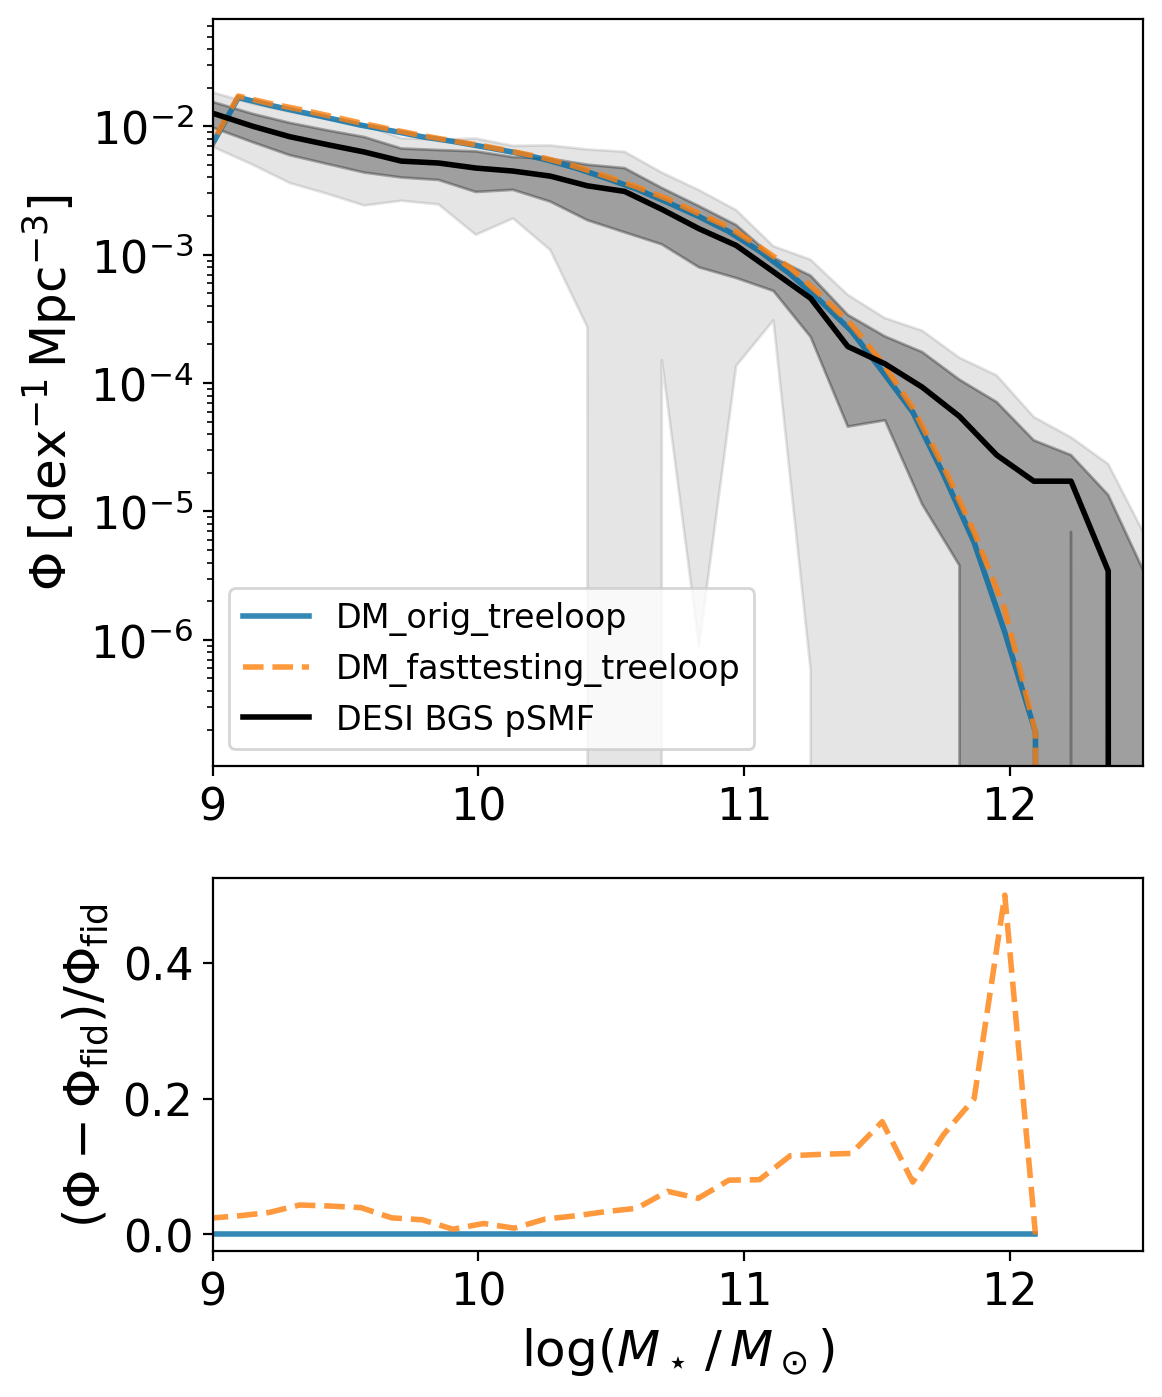

In [58]:
rng = np.random.default_rng()
#colors = ['black']*len(smf_arr)
#color_mode = 'continuous'
#colors, cmap, locs_norm = utils.get_colors(vals_kagn, log=True)
colors = ['green', 'blue', 'purple']
lss = ['-', '--', '-.', ':', '-', '--', '-.', ':']
color_mode = None
 
fig, axarr = plt.subplots(2, 1, figsize=(6, 8), #sharex=True,
                          height_ratios=[2, 1])
ax, ax1 = axarr
 
i_fid = 0
smf_fid = smf_fastt_arr[i_fid]

for i in range(len(smf_fastt_arr)):
    # if i==0:
    #     label='L-Galaxies SMF'
    # else:
    #     label=None
    label = tags_lgal[i][1:]
    ax.plot(bins_log_mstar, smf_fastt_arr[i], lw=2, #color=colors[i], 
             ls=lss[i],
             alpha=0.8, label=label)
    
    # print(label)
    # print((smf_fastt_arr[i]-smf_fid)/smf_fid)
    ax1.plot(bins_log_mstar, (smf_fastt_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i], 
            ls=lss[i],
            alpha=0.8, label=label)
    
if color_mode=='continuous':
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
    cb = plt.colorbar(sm, ax=ax, extend='max')
    cbar_label = r'$k_\text{AGN}$, efficiency of AGN feedback'
    cb.set_label(label=cbar_label, size=14)
        

ax.plot(ms, psmf_bgs_mean, color='black', label=r'DESI BGS pSMF')
ax.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 )
ax.fill_between(ms, 
                 psmf_bgs_mean-2*psmf_bgs_std, 
                 psmf_bgs_mean+2*psmf_bgs_std,
                 color='black', alpha=0.1,
                 )

# plt.errorbar(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, yerr=m13ksf_err, color='blue', marker='o', 
#              alpha=0.5, markersize=4, ls='None', #facecolor='None', s=8,
#              label='SDSS/PRIMUS \n(Moustakas+2013)')
    
ax.set_xlim(9, 12.5)
ax1.set_xlim(9, 12.5)

ax.set_yscale('log')
ax1.set_xlabel(r'$\log(M_\star\,/\,M_\odot)$')
ax.set_ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
ax1.set_ylabel(r'$(\Phi-\Phi_\text{fid})/\Phi_\text{fid}$')
ax.set_xlim(9, 12.5)

handles, labels = ax.get_legend_handles_labels()
if color_mode=='discrete':
    handles.extend(handles_discrete)
ax.legend(handles=handles, fontsize=12)



### Combining treefiles

In [33]:
gal_trees_arr = []
fn_trees_arr = []

dir_base = '/dipc/kstoreyf/external/LGalaxies2020_PublicRepository'
dir_base_input = '/dipc/kstoreyf/external/LGalaxaies2020_PublicRepository/input'
model = 'default' #'default'
if model=='default':
    test_str = 'test3'
elif model=='modified':
    test_str = 'test1'

tag_lgal = '_DM_fasttesting_treeloop'
tags_trees = ['_tree5-5', '_tree0-63']
for tag_trees in tags_trees:
       
    dir_out = f'{dir_base}/output/output{tag_lgal}/samples'
    fn_out = f'{dir_out}/Planck_Mil-I_snapshots_{model}_{test_str}_z0.00-0.00_All{tag_trees}.npy'
    print(fn_out)
    gals = np.load(fn_out)
    gal_trees_arr.append(gals)
    fn_trees_arr.append(fn_out)

/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_fasttesting_treeloop/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All_tree5-5.npy
/dipc/kstoreyf/external/LGalaxies2020_PublicRepository/output/output_DM_fasttesting_treeloop/samples/Planck_Mil-I_snapshots_default_test3_z0.00-0.00_All_tree0-63.npy


In [43]:

smf_trees_arr = []
for i in range(len(gal_trees_arr)):
    log_mstar = np.log10(gal_trees_arr[i]['StellarMass'])
    vol_Mpc_thisfile = get_volume_Mpc(box_size, h, tags_trees[i])
    bins_log_mstar, smf = utils.compute_smf(log_mstar, vol_Mpc_thisfile)
    smf_trees_arr.append(smf)

_tree5-5 1
_tree0-63 64


tree5-5
[        nan         nan         nan         nan         nan         nan
         nan         nan  0.05913335 -0.01142705  0.00103433 -0.02837927
  0.01893681  0.04339073 -0.003248    0.02895744  0.01786423  0.00981402
  0.03680463  0.01086736  0.05785124  0.0368012   0.04704217  0.04704395
  0.08129712 -0.13402543 -0.12154787 -0.1182016  -0.06698188 -0.18389262
 -0.07124011  0.71940299 -0.45299145 -1.         -1.         -1.
         nan         nan         nan]
tree0-63
[nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 nan nan nan]


/tmp/ipykernel_327021/3758236625.py:27: RuntimeWarning: invalid value encountered in divide
  print((smf_trees_arr[i]-smf_fid)/smf_fid)
/tmp/ipykernel_327021/3758236625.py:28: RuntimeWarning: invalid value encountered in divide
  ax1.plot(bins_log_mstar, (smf_trees_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i],


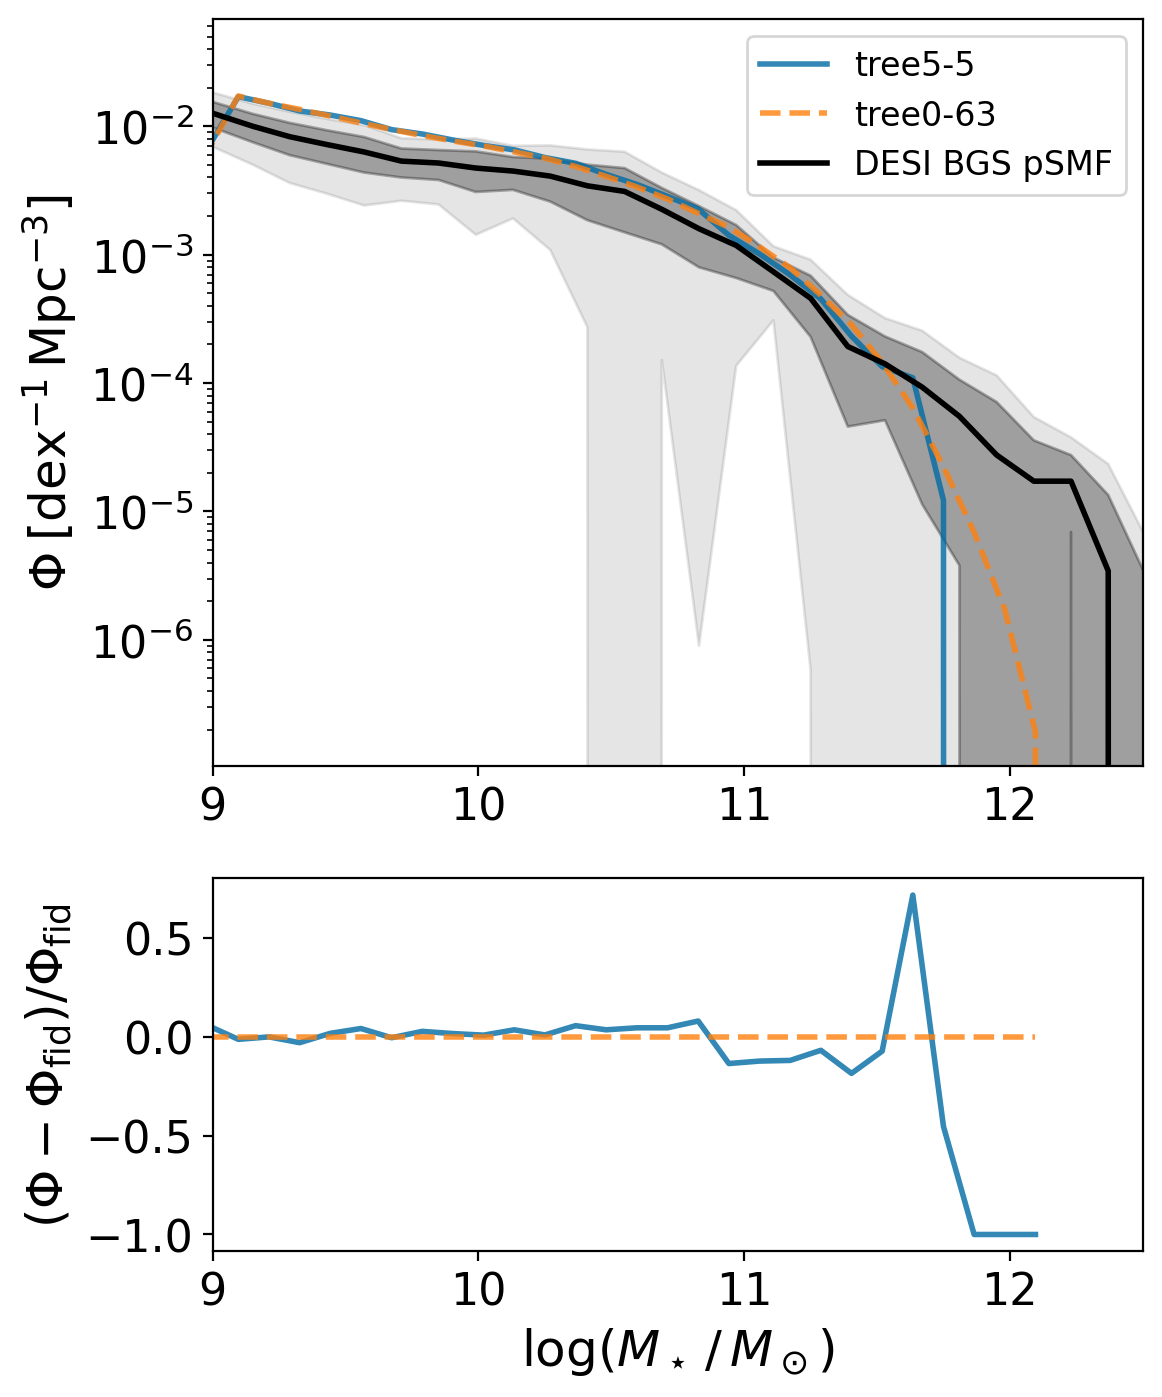

In [53]:
rng = np.random.default_rng()
#colors = ['black']*len(smf_arr)
#color_mode = 'continuous'
#colors, cmap, locs_norm = utils.get_colors(vals_kagn, log=True)
colors = ['green', 'blue', 'purple']
lss = ['-', '--', '-.', ':', '-', '--', '-.', ':']
color_mode = None
 
fig, axarr = plt.subplots(2, 1, figsize=(6, 8), #sharex=True,
                          height_ratios=[2, 1])
ax, ax1 = axarr
 
i_fid = 1
smf_fid = smf_trees_arr[i_fid]

for i in range(len(smf_trees_arr)):
    # if i==0:
    #     label='L-Galaxies SMF'
    # else:
    #     label=None
    label = tags_trees[i][1:]
    ax.plot(bins_log_mstar, smf_trees_arr[i], lw=2, #color=colors[i], 
             ls=lss[i],
             alpha=0.8, label=label)
    
    print(label)
    print((smf_trees_arr[i]-smf_fid)/smf_fid)
    ax1.plot(bins_log_mstar, (smf_trees_arr[i]-smf_fid)/smf_fid, lw=2, #color=colors[i], 
            ls=lss[i],
            alpha=0.8, label=label)
    
if color_mode=='continuous':
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
    cb = plt.colorbar(sm, ax=ax, extend='max')
    cbar_label = r'$k_\text{AGN}$, efficiency of AGN feedback'
    cb.set_label(label=cbar_label, size=14)
        

ax.plot(ms, psmf_bgs_mean, color='black', label=r'DESI BGS pSMF')
ax.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 )
ax.fill_between(ms, 
                 psmf_bgs_mean-2*psmf_bgs_std, 
                 psmf_bgs_mean+2*psmf_bgs_std,
                 color='black', alpha=0.1,
                 )

# plt.errorbar(m13ksf_log_m_msun, m13ksf_phi_Mpcn3, yerr=m13ksf_err, color='blue', marker='o', 
#              alpha=0.5, markersize=4, ls='None', #facecolor='None', s=8,
#              label='SDSS/PRIMUS \n(Moustakas+2013)')
    
ax.set_xlim(9, 12.5)
ax1.set_xlim(9, 12.5)

ax.set_yscale('log')
ax1.set_xlabel(r'$\log(M_\star\,/\,M_\odot)$')
ax.set_ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')
ax1.set_ylabel(r'$(\Phi-\Phi_\text{fid})/\Phi_\text{fid}$')
ax.set_xlim(9, 12.5)

handles, labels = ax.get_legend_handles_labels()
if color_mode=='discrete':
    handles.extend(handles_discrete)
ax.legend(handles=handles, fontsize=12)

